# Root Locus Design

In [ ]:
import requests as req
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

try:
    from control.matlab import tf, lsim, step, rlocus, feedback
except:
    !python3 -m pip install control
    from control.matlab import tf, lsim, step, rlocus, feedback
    
from control_materials import *
import cmath, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log


Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
Basic file found
This is a library of useful functions for the control systems in 16.06


## Topic 11 Design Example 2

In [1]:
# define Plant
num = 4**2
den = np.convolve([1, 0],[1, 2*0.5*4, 4**2])
G = tf(num,den)

# Basic Control
K_proportional = 2
# Loop Gain L
L = K_proportional*G
Gcl_proportional=feedback(L,1)
scl_proportional = Gcl_proportional.poles()
s_ol = G.poles()

G

NameError: name 'np' is not defined

In [ ]:
# Target poles 
# 
wn = 2*np.abs(s_ol[0])
zeta = 0.7
s_target = complex(-zeta * wn, wn*np.sqrt(1-zeta**2))

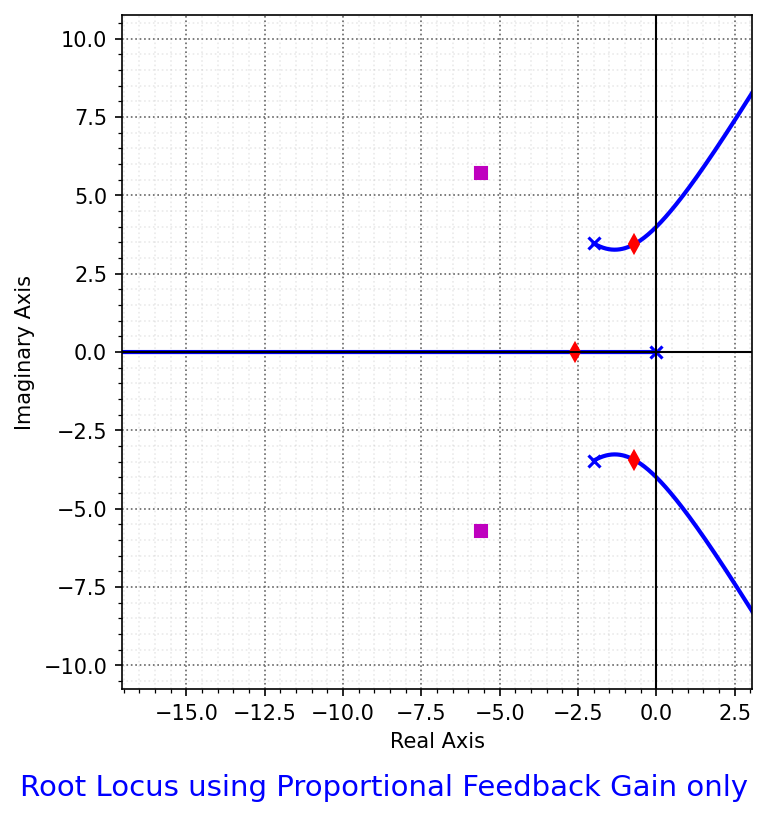

In [ ]:
fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
r_proportional = rlocus(L,kvect=Root_Locus_gains(L),xlim = (-5,5),ylim=(-5,5),ax=ax,color='b',grid=True)
plt.plot(scl_proportional.real,scl_proportional.imag,'rd')
ax.plot(s_target.real,s_target.imag,'ms')
ax.plot(s_target.real,-s_target.imag,'ms')
ax.axis('equal')
ax.set_ylim(-10,10)
ax.set_xlim(-15,1)
ax.set_xlabel('Real Axis')
ax.set_ylabel('Imaginary Axis')
caption("Root Locus using Proportional Feedback Gain only",fig,yloc=-0.05)
nicegrid(ax)
savefig("./figs/L11_des2_0.pdf", dpi=600)
plt.show()

Using Tp
omega_n: 	2.749
zeta   : 	0.408
Tr     : 	0.53s
Ts     : 	4.97s
Mp     : 	0.25
Tp     : 	1.25s
Yss    : 	1.00
Using self.SettlingTimeLimits[0] = 0.02


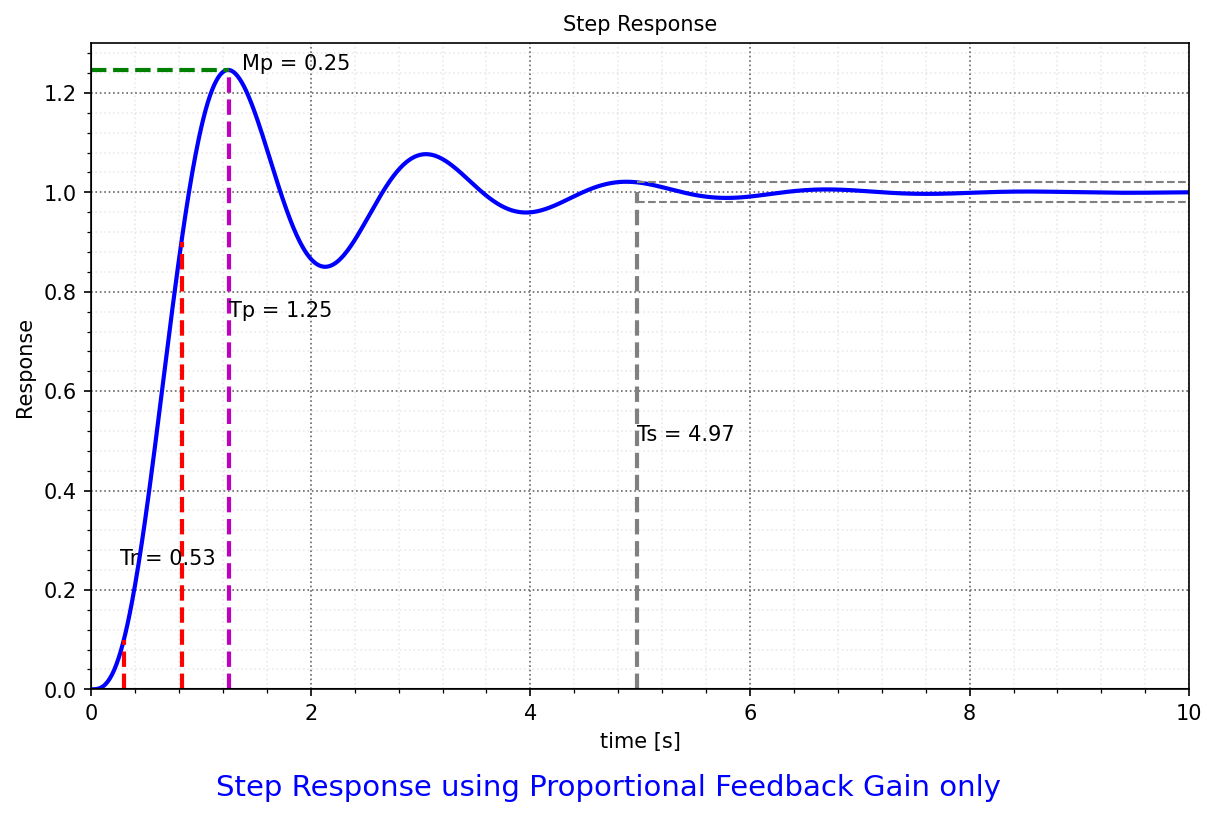

In [ ]:
fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
t = np.linspace(0,10,1000)
y_proportional, t = step(Gcl_proportional,T=t)
S = Step_info(t,y_proportional)
S.printout()
S.nice_plot(ax)
caption("Step Response using Proportional Feedback Gain only",fig,yloc=-0.05)
nicegrid(ax)
savefig("./figs/L11_des2_0a.pdf", dpi=600)
plt.show()

In [ ]:
z_comp = 0.5*abs(s_target.real) # to the left of the target pole locations to 
                                # avoid trapping the pole on the real line to the right of the dominant poles
phi_z = cmath.phase(s_target + z_comp)*180/np.pi
Gpoles = G.poles()
Gzeros = G.zeros()

N = 2 # Double Lead
phi_p = N*phi_z - sum([cmath.phase(x) for x in (s_target - Gpoles)])*180/np.pi
p_comp = - s_target.real + s_target.imag/-np.tan(np.mod((-180.0-phi_p)/N,360.0)*np.pi/180.0)
Gc = tf([1, z_comp],[1, p_comp])
Gc = Gc**N

L_lead = G * Gc
Kc = 1/abs(L_lead(s_target))
print(f"{Kc = : 5.3f}")
print(f"{z_comp = : 5.3f}")
print(f"{p_comp = : 5.3f}")
Gc *= Kc
L_lead *= Kc

with open(source+"Gc_11_16_zero.txt", "w") as f:
    f.write(str(f"{np.real(-Gc.zeros())[0]:4.2f}"))
with open(source+"Gc_11_16_pole.txt", "w") as f:
    f.write(str(f"{np.real(-Gc.poles())[0]:4.2f}"))
with open(source+"Gc_11_16_gain.txt", "w") as f:
    gain = Gc.num[0][0]/Gc.den[0][0]
    f.write(str(f"{gain[0]:4.2f}"))

Gc

Kc =  662.311
z_comp =  2.800
p_comp =  40.938


TransferFunction(array([ 662.311,  3708.944,  5192.521]), array([   1.000,   81.876,  1675.903]))

In [ ]:
Gcl_lead = feedback(L_lead,1)
scl_lead = Gcl_lead.poles()
print("Frequency of closed looop poles",np.abs(scl_lead))

Frequency of closed looop poles [  54.625   18.786    8.000    8.000    1.265]



Found breakin/out at K = -0.000
At possible locations s = -40.938


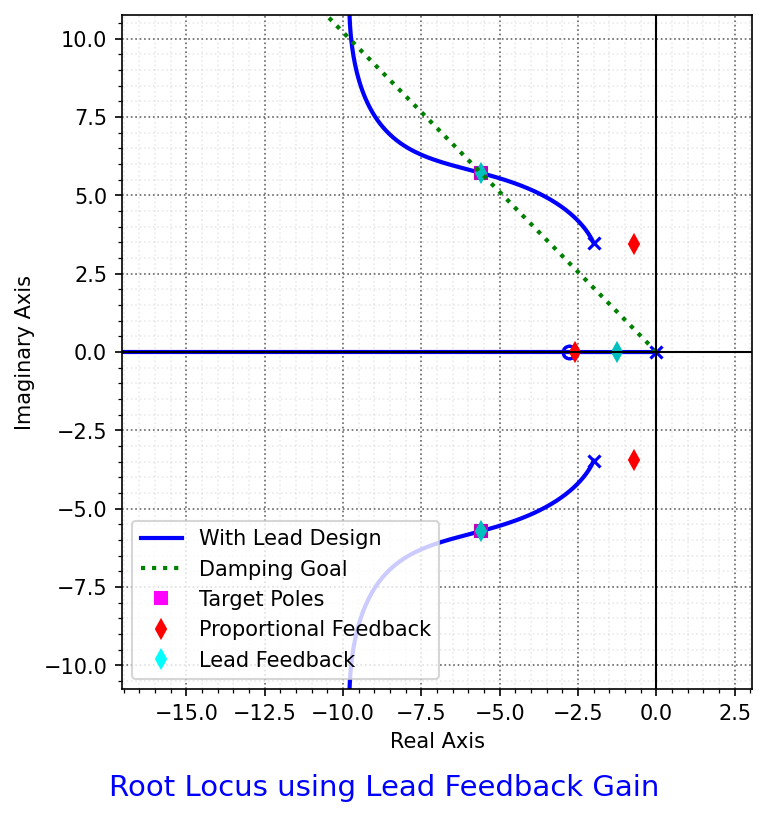

In [ ]:
fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
r_new = rlocus(L_lead,kvect=Root_Locus_gains(L_lead),xlim = (-60,10), ylim=(-35,35), ax=ax,color='b',grid=False)
ax.plot(s_target.real,s_target.imag,'ms')
ax.plot(s_target.real,-s_target.imag,'ms')
plt.plot(scl_proportional.real,scl_proportional.imag,'rd')
plt.plot(scl_lead.real,scl_lead.imag,'cd')
th = np.cos(zeta)
plt.plot([0,-10*zeta*wn],[0,10*wn*np.sqrt(1-zeta**2)],'g:')
ax.axis('equal')
ax.set_xlim(-15,1)
ax.set_ylim(-10,10)
ax.set_xlabel('Real Axis')
ax.set_ylabel('Imaginary Axis')
nicegrid(ax)
caption("Root Locus using Lead Feedback Gain",fig,yloc=-0.05)

from matplotlib.lines import Line2D
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='g', lw=2, linestyle=':'),
#    Line2D([0], [0], color='c', lw=2, linestyle='--'),
    Line2D([0], [0], color='magenta', marker='s', linestyle='None', markersize=6),
    Line2D([0], [0], color='red', marker='d', linestyle='None', markersize=6),
    Line2D([0], [0], color='cyan', marker='d', linestyle='None', markersize=6)
]
# Add legend with custom handles
ax.legend(custom_lines, ['With Lead Design', 'Damping Goal', 'Target Poles', 'Proportional Feedback', 'Lead Feedback'], loc=3)

savefig("./figs/L11_des2_1.pdf", dpi=600)
plt.show()

Pole to cancel = -1.265


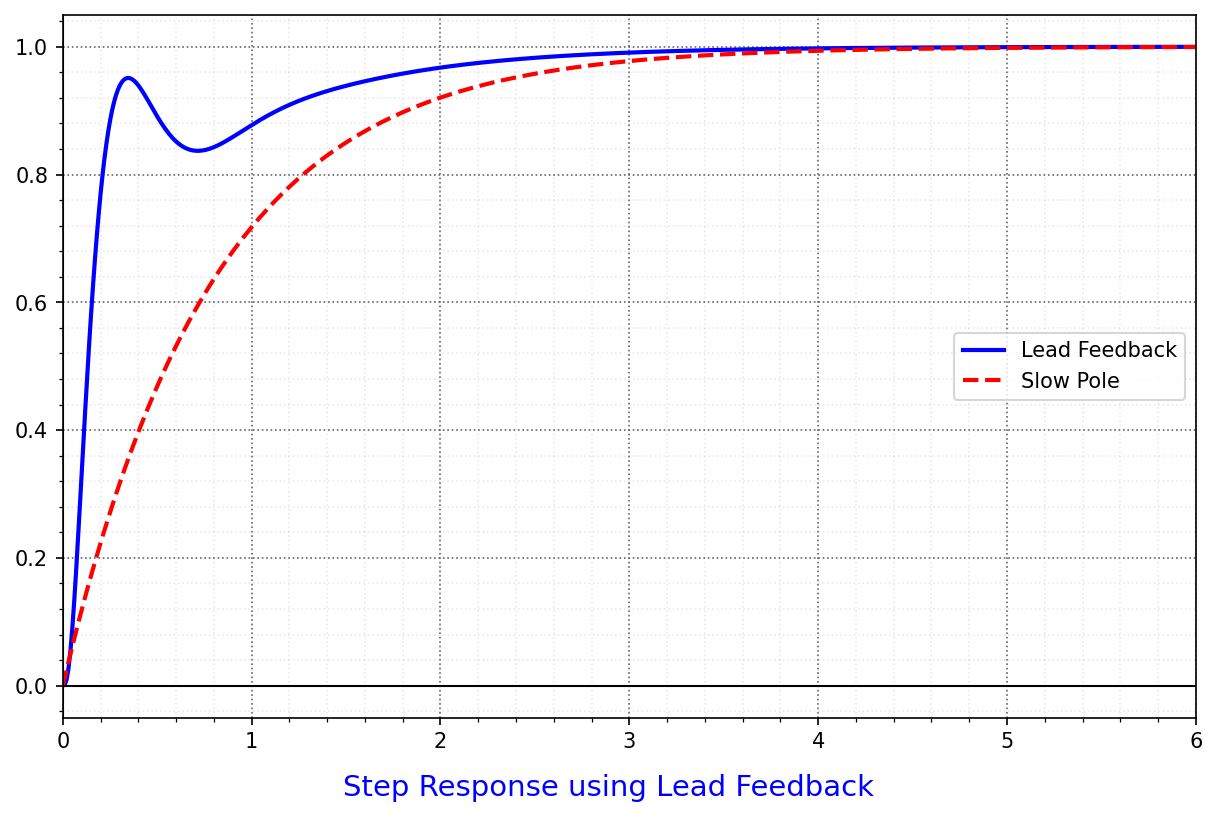

In [ ]:
y_lead,t_lead=step(Gcl_lead,t)

# find real clp poles
pdrr = [x.real for x in scl_lead if np.abs(x.imag) < 1e-3]
# now see which is at low freq that we might want to cancel
s_cancel = max([x for x in pdrr if x < 0])
print("Pole to cancel = {:4.3f}".format(s_cancel))

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t_lead,y_lead,'b',label='Lead Feedback')
plt.plot(t_lead,1-np.exp(s_cancel*t_lead),'r--',label='Slow Pole')
caption("Step Response using Lead Feedback",fig,yloc=-0.05)
plt.xlim(0,6)
plt.legend()
nicegrid(ax)
savefig("./figs/L11_des2_1a.pdf", dpi=600)
plt.show()

## Add feedforward to architecture

In [ ]:
# Add feedforward
from scipy.optimize import minimize

def feedback_ff(G,Gc,Kf = 1):
    return G*(tf(Kf,1)+Gc)/(1+G*Gc)

In [ ]:
# see what value of gain leads to a cancellation

# Approach 1: use scipy minimize
def func(x, Tol = 1e-3):
    rr = np.roots(Gc.den[0][0]*x + Gc.num[0][0])  # num roots
    try:
        rrr = max([x.real for x in rr if np.abs(x.imag) < Tol])
    except:
       rrr = 100
    return np.abs(rrr - s_cancel)**2

res = minimize(func, [-100], method='Nelder-Mead', tol=1e-6)
print(f"Gain to cancel: {res.x[0] = :4.3f}")

# Approach 2: use sympy to solve the polynomial
# compute answer a second way to confirm
from sympy import roots, N
KK = Symbol('kk')
x = Symbol('x')
# find list of numerator roots
rr = roots(Gc.den[0][0]*KK + Gc.num[0][0],x)
for root, multiplicity in rr.items():
    # find the gain that gives a numerator root close to the desired value s_cancel
    kff = (np.real(solve(root - s_cancel,KK)[0])).astype('complex').real.item()
    will_this_gain_cancel_pole = False
    for roots_obtained_with_that_gain in np.roots(Gc.den[0][0]*kff +  Gc.num[0][0]):
        if np.abs(roots_obtained_with_that_gain - s_cancel) < 1e-4:
            print("\nCancellation achieved with Kff: {:8.6f} ".format(kff))
            print("Check cancellation: {:8.6f} == {:8.6f}?".format(roots_obtained_with_that_gain, s_cancel))
            will_this_gain_cancel_pole = True
    if not will_this_gain_cancel_pole:
        print("\nCancellation not achieved with Kff: {:8.6f} ".format(kff))
        
print("Compare answers from scipy and sympy",res.x[0]-kff)

Gain to cancel: res.x[0] = -0.991

Cancellation not achieved with Kff: -662.311380 

Cancellation achieved with Kff: -0.991475 
Check cancellation: -1.265021 == -1.265021?
Compare answers from scipy and sympy -1.0415292284182698e-07


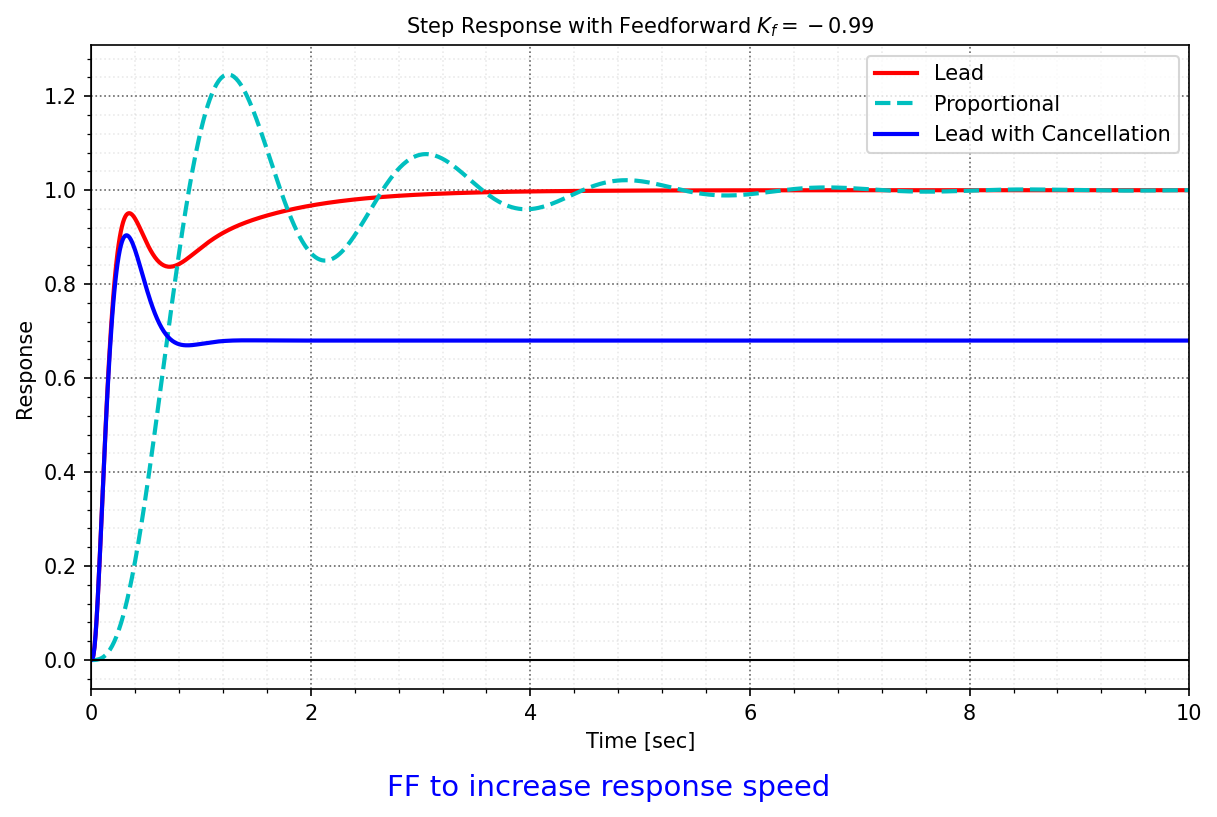

In [ ]:
Gcl_cancel = feedback_ff(G,Gc,kff)
y_cancel,t_cancel = step(Gcl_cancel,t_lead)

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
ax.plot(t_lead,y_lead,'r-',label='Lead')
plt.plot(t,y_proportional,'c--',label='Proportional')
ax.plot(t_cancel,y_cancel,'b-',label='Lead with Cancellation')
nicegrid(ax)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Response')
plt.legend()
plt.title(r"Step Response with Feedforward $K_f = {:4.2f}$".format(kff))
caption("FF to increase response speed",fig,yloc=-0.05)
savefig("./figs/L11_des2_2.pdf", dpi=600)
plt.show()

Using Tp
omega_n: 	10.393
zeta   : 	0.333
Tr     : 	0.11s
Ts     : 	0.68s
Mp     : 	0.33
Tp     : 	0.32s
Yss    : 	1.00
Using self.SettlingTimeLimits[0] = 0.02


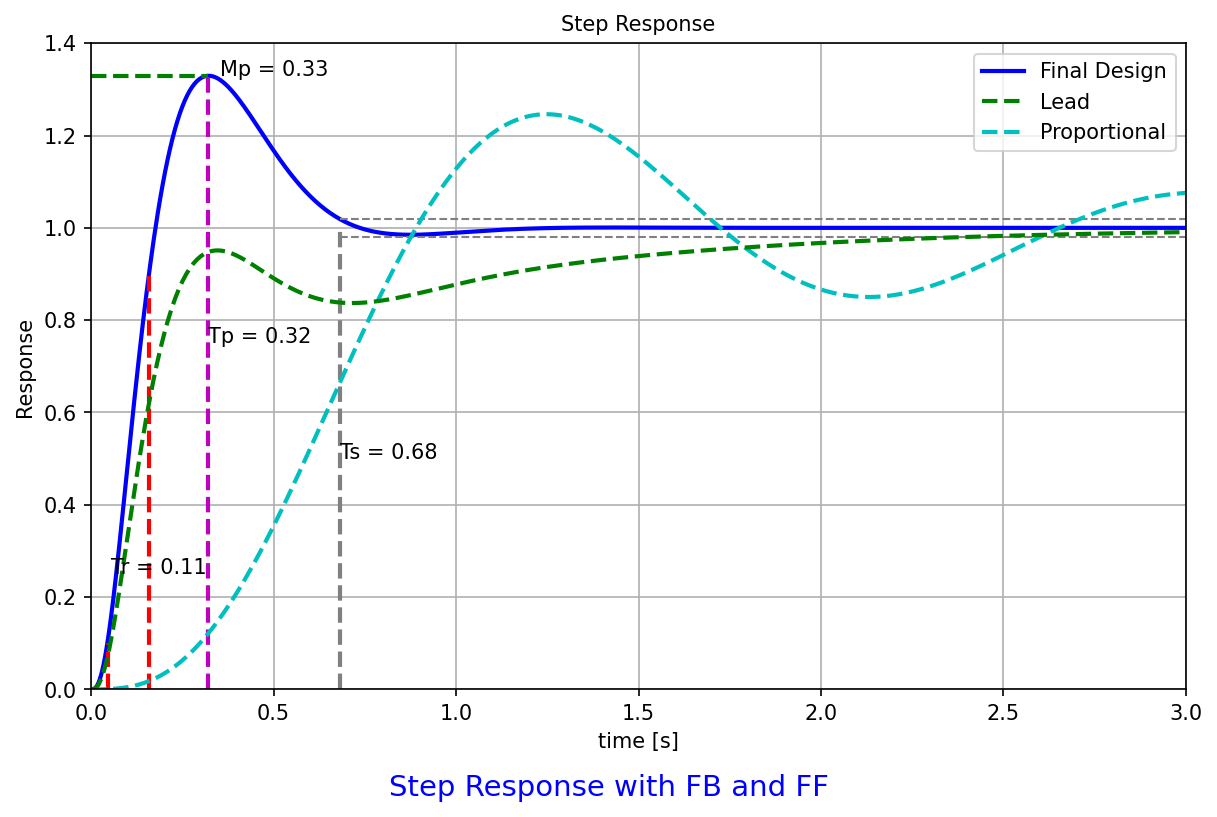

In [ ]:
# Improve steady state error using cancellation
K1 = 1/np.abs(np.trim_zeros(Gcl_cancel.num[0][0], 'b')[-1]/np.trim_zeros(Gcl_cancel.den[0][0], 'b')[-1]) # normalize to set step resp to right SS value
Gcl_cancel *= K1
y_lead2,t_lead2=step(Gcl_cancel,3)

fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150,constrained_layout = True)
S_lead2 = Step_info(t_lead2,y_lead2)
S_lead2.printout()
S_lead2.nice_plot(ax)
plt.plot(t,y_proportional,'c--')
plt.plot(t_lead,y_lead,'g--')
plt.legend(['Lead - cancelled/scaled'])
caption("Step Response with FB and FF",fig,yloc=-0.05)

from matplotlib.lines import Line2D
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='green', lw=2, linestyle='--'),
    Line2D([0], [0], color='c', lw=2, linestyle='--')
]
# Add legend with custom handles
ax.legend(custom_lines, ['Final Design', 'Lead', 'Proportional', ])
savefig("./figs/L11_des2_3.pdf", dpi=600)
plt.show()